In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [23]:
sheets = pd.read_excel("Regional Sales Dataset.xlsx" , sheet_name = None  )

In [24]:
df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state = sheets['State Regions']
df_budget = sheets['2017 Budgets']

In [25]:
df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [26]:
df_customers.head()

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [27]:
df_products.head()

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [28]:
df_regions.head()

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [29]:
df_budget.head()


,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [30]:
nav_header = df_state.iloc[0]

In [31]:
df_state.columns = nav_header

In [32]:
df_state_cleaned = df_state.iloc[1:].reset_index(drop=True)

In [33]:
df_state_cleaned

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West
5,CT,Connecticut,Northeast
6,DC,District of Columbia,South
7,DE,Delaware,South
8,FL,Florida,South
9,GA,Georgia,South


In [34]:
df_sales.isnull().sum()

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [35]:

df_budget .isnull().sum()

,0
Product Name,0
2017 Budgets,0


In [36]:

df_state .isnull().sum()

,0
0,
State Code,0
State,0
Region,0


In [37]:
df_regions .isnull().sum()

,0
id,0
name,0
county,0
state_code,0
state,0
type,0
latitude,0
longitude,0
area_code,0
population,0


In [38]:
df_customers .isnull().sum()

,0
Customer Index,0
Customer Names,0


In [39]:
df_products.isnull().sum()

,0
Index,0
Product Name,0


In [40]:

df_budget .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  30 non-null     object 
 1   2017 Budgets  30 non-null     float64
dtypes: float64(1), object(1)
memory usage: 612.0+ bytes


In [41]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OrderNumber                64104 non-null  object        
 1   OrderDate                  64104 non-null  datetime64[ns]
 2   Customer Name Index        64104 non-null  int64         
 3   Channel                    64104 non-null  object        
 4   Currency Code              64104 non-null  object        
 5   Warehouse Code             64104 non-null  object        
 6   Delivery Region Index      64104 non-null  int64         
 7   Product Description Index  64104 non-null  int64         
 8   Order Quantity             64104 non-null  int64         
 9   Unit Price                 64104 non-null  float64       
 10  Line Total                 64104 non-null  float64       
 11  Total Unit Cost            64104 non-null  float64       
dtypes: d

In [42]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Index         30 non-null     int64 
 1   Product Name  30 non-null     object
dtypes: int64(1), object(1)
memory usage: 612.0+ bytes


In [43]:
df_customers .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer Index  175 non-null    int64 
 1   Customer Names  175 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.9+ KB


In [44]:
df_regions .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             994 non-null    int64  
 1   name           994 non-null    object 
 2   county         994 non-null    object 
 3   state_code     994 non-null    object 
 4   state          994 non-null    object 
 5   type           994 non-null    object 
 6   latitude       994 non-null    float64
 7   longitude      994 non-null    float64
 8   area_code      994 non-null    int64  
 9   population     994 non-null    int64  
 10  households     994 non-null    int64  
 11  median_income  994 non-null    int64  
 12  land_area      994 non-null    int64  
 13  water_area     994 non-null    int64  
 14  time_zone      994 non-null    object 
dtypes: float64(2), int64(7), object(6)
memory usage: 116.6+ KB


In [45]:
df_state .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   State Code  49 non-null     object
 1   State       49 non-null     object
 2   Region      49 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [46]:

df_budget .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  30 non-null     object 
 1   2017 Budgets  30 non-null     float64
dtypes: float64(1), object(1)
memory usage: 612.0+ bytes


In [47]:
## Merge df_sales with Customers

df = df_sales.merge(
    df_customers,
    how = 'left',
    left_on = 'Customer Name Index',
    right_on = 'Customer Index'

)

In [48]:
df

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,74,Wholesale,USD,AXW291,825,26,12,1815.7,21788.4,980.478,74,Dazzlesphe Corp
64100,SO - 0007706,2018-02-28,51,Export,USD,NXH382,444,21,6,864.3,5185.8,579.081,51,Yombu Corp
64101,SO - 0007718,2018-02-28,136,Distributor,USD,AXW291,312,13,11,3953.0,43483.0,2648.510,136,Bath Group
64102,SO - 0008084,2018-02-28,158,Distributor,USD,AXW291,737,20,7,3959.7,27717.9,2930.178,158,Linklinks Ltd


In [49]:
## Merge df_sales with Products

df = df.merge(
    df_products,
    how = 'left',
    left_on = 'Product Description Index',
    right_on = 'Index'

)

In [50]:
df

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,74,Wholesale,USD,AXW291,825,26,12,1815.7,21788.4,980.478,74,Dazzlesphe Corp,26,Product 26
64100,SO - 0007706,2018-02-28,51,Export,USD,NXH382,444,21,6,864.3,5185.8,579.081,51,Yombu Corp,21,Product 21
64101,SO - 0007718,2018-02-28,136,Distributor,USD,AXW291,312,13,11,3953.0,43483.0,2648.510,136,Bath Group,13,Product 13
64102,SO - 0008084,2018-02-28,158,Distributor,USD,AXW291,737,20,7,3959.7,27717.9,2930.178,158,Linklinks Ltd,20,Product 20


In [51]:
## Merge df_sales with Regions

df = df.merge(
    df_regions,
    how = 'left',
    left_on = 'Delivery Region Index',
    right_on = 'id'


)

In [52]:
## Merge df_sales with 2017 budget

df = df.merge(
    df_budget,
    how = 'left',
    on = 'Product Name'

)



In [53]:
df

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,1085037.329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,74,Wholesale,USD,AXW291,825,26,12,1815.7,...,40.15511,-74.82877,445,51326,18095,69878,26311722,253129,America/New York,5685138.270
64100,SO - 0007706,2018-02-28,51,Export,USD,NXH382,444,21,6,864.3,...,42.11030,-88.03424,847,69308,26242,71573,35271964,370235,America/Chicago,959899.218
64101,SO - 0007718,2018-02-28,136,Distributor,USD,AXW291,312,13,11,3953.0,...,26.24453,-80.20644,954,57234,20651,42786,22943340,594611,America/New York,3720639.645
64102,SO - 0008084,2018-02-28,158,Distributor,USD,AXW291,737,20,7,3959.7,...,42.91002,-78.74182,716,87514,38912,48662,76228647,162756,America/New York,2067108.120


In [54]:
df = df.merge(
    df_state_cleaned[['State Code', 'Region']],   # correct column names
    how='left',
    left_on='state_code',
    right_on='State Code'
)


In [55]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,2017 Budgets,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,964940.231,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,2067108.120,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,5685138.270,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,889737.555,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,1085037.329,CT,Northeast


In [56]:
df.to_csv('final_dataset.csv', index=False)

In [57]:
df = pd.read_csv("final_dataset.csv")

In [58]:
df = df.drop(columns=['Customer Index' , 'Index' , 'id' , 'State Code'])

In [59]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,2017 Budgets,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,964940.231,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,2067108.120,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,5685138.270,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,889737.555,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,1085037.329,Northeast


In [60]:
df.columns = [
    re.sub(r'(?<!^)(?=[A-Z])', '_', col).replace(" ", "").lower()
    for col in df.columns.astype(str)
]

In [61]:
df.columns

Index(['order_number', 'order_date', 'customer_name_index', 'channel',
       'currency_code', 'warehouse_code', 'delivery_region_index',
       'product_description_index', 'order_quantity', 'unit_price',
       'line_total', 'total_unit_cost', 'customer_names', 'product_name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households', 'median_income',
       'land_area', 'water_area', 'time_zone', '2017_budgets', 'region'],
      dtype='object')

In [62]:
df = df.rename(columns = {"county" : "country" , "2017_budgets" : "budget" ,
                          "line_total" : "revenue" , "latitude" : "lat" ,
                          "longitude" : "long" , "total_unit_cost" : "cost" ,
                          "state" : "state_name"
  }
)

In [63]:
cols_to_keep = [

    'order_number',
    'order_date',
    'customer_names',
    'channel',
    'product_name',
    'order_quantity',
    'unit_price',
    'revenue',
    'cost',
    'state_code',
    "state_name",
    'country',
    'region',
    'lat',
    "long",
    'budget'

]

In [64]:
df = df[cols_to_keep]

In [65]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df.loc[df['order_date'].dt.year != 2017, 'budget'] = pd.NA


/tmp/ipython-input-65-48043062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')


In [66]:
df.head()

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,state_name,country,region,lat,long,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,Chatham County,South,32.08354,-81.09983,NaN
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Johnson County,Midwest,39.61366,-86.10665,NaN
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,Alameda County,West,37.66243,-121.87468,NaN
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Monroe County,Midwest,39.16533,-86.52639,NaN
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Hartford County,Northeast,41.77524,-72.52443,NaN


In [67]:
df.to_csv('final_cleaned_dataset.csv', index=False)

In [68]:
df_2017 = df[df["order_date"].dt.year == 2017]

In [69]:
df_2017.to_csv('df_2017.csv', index=False)

**Fearure Engineering**


In [70]:
 df["total_cost"] = df['order_quantity'] * df["cost"]

In [71]:
df["profit"] = df["revenue"] - df["total_cost"]

In [72]:
df["profit_margin_pct"] = df["profit"] / df["revenue"] * 100

In [73]:
df

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,state_name,country,region,lat,long,budget,total_cost,profit,profit_margin_pct
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,Chatham County,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Johnson County,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,Alameda County,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Monroe County,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Hartford County,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,Pennsylvania,Bucks County,Northeast,40.15511,-74.82877,NaN,11765.736,10022.664,46.0
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,Illinois,Cook County,Midwest,42.11030,-88.03424,NaN,3474.486,1711.314,33.0
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,Florida,Broward County,South,26.24453,-80.20644,NaN,29133.610,14349.390,33.0
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,New York,Erie County,Northeast,42.91002,-78.74182,NaN,20511.246,7206.654,26.0


**EDA**

In [74]:
##Graph Types

[
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-whitegrid',
 'seaborn-v0_8-poster',
 'dark_background',
 'ggplot',
 'bmh',
 'fivethirtyeight',
 'classic',
 'Solarize_Light2',
 '_classic_test'
]


['seaborn-v0_8-darkgrid',
 'seaborn-v0_8-whitegrid',
 'seaborn-v0_8-poster',
 'dark_background',
 'ggplot',
 'bmh',
 'fivethirtyeight',
 'classic',
 'Solarize_Light2',
 '_classic_test']

/tmp/ipython-input-75-374859249.py:49: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


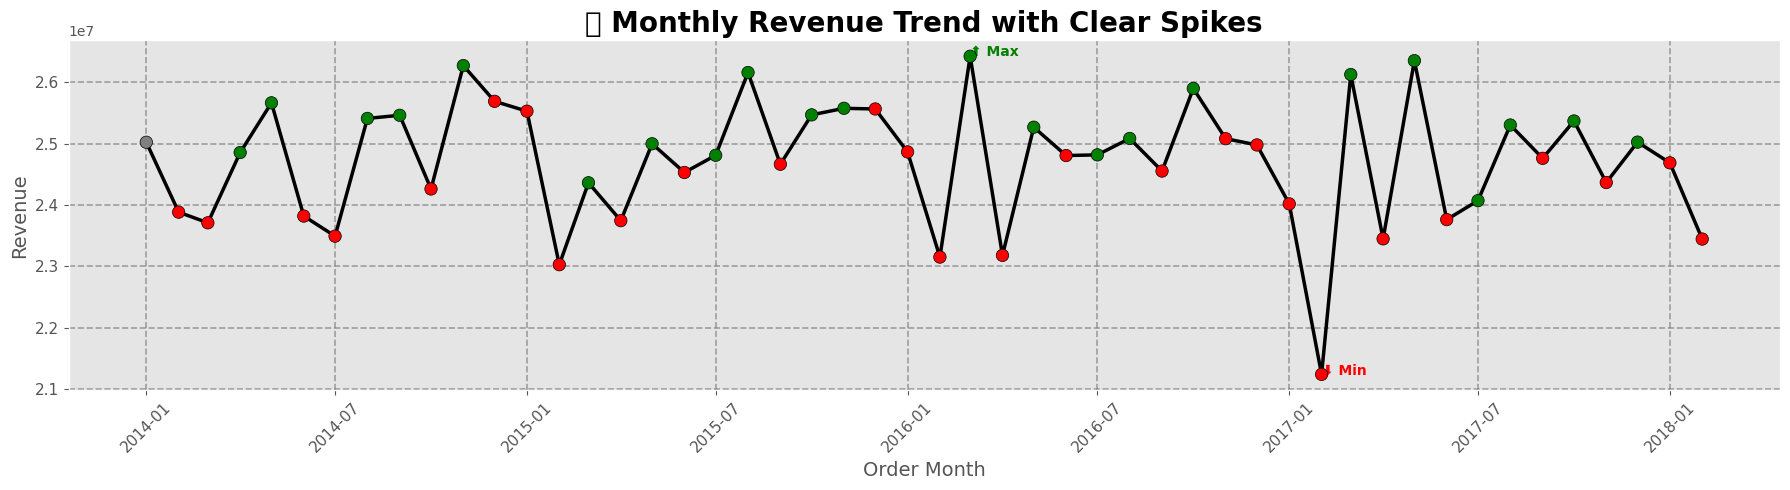

In [75]:

plt.style.use('ggplot')

df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df["order_month"] = df["order_date"].dt.to_period("M")

Monthly_sales = df.groupby("order_month")["revenue"].sum().reset_index()
Monthly_sales['order_month'] = pd.to_datetime(Monthly_sales['order_month'].astype(str))


Monthly_sales['change'] = Monthly_sales['revenue'].diff()
Monthly_sales['trend'] = Monthly_sales['change'].apply(lambda x: 'up' if x > 0 else ('down' if x < 0 else 'flat'))


plt.figure(figsize=(18, 5))


colors = Monthly_sales['trend'].map({'up': 'green', 'down': 'red', 'flat': 'gray'})


sns.lineplot(data=Monthly_sales, x='order_month', y='revenue', linewidth=2.5, color='black')


plt.scatter(Monthly_sales['order_month'], Monthly_sales['revenue'],
            color=colors, s=80, edgecolor='black', zorder=5)


max_point = Monthly_sales.loc[Monthly_sales['revenue'].idxmax()]
min_point = Monthly_sales.loc[Monthly_sales['revenue'].idxmin()]

plt.text(max_point['order_month'], max_point['revenue'], '⬆ Max', fontsize=10, color='green', weight='bold')
plt.text(min_point['order_month'], min_point['revenue'], '⬇ Min', fontsize=10, color='red', weight='bold')


plt.title('Monthly Revenue Trend with Clear Spikes', fontsize=20, weight='bold')
plt.xlabel('Order Month', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)

plt.grid(
    which='major',
    axis='both',
    linestyle='--',
    linewidth=1.2,
    color='gray',
    alpha=0.7
)

plt.tight_layout()
plt.show()


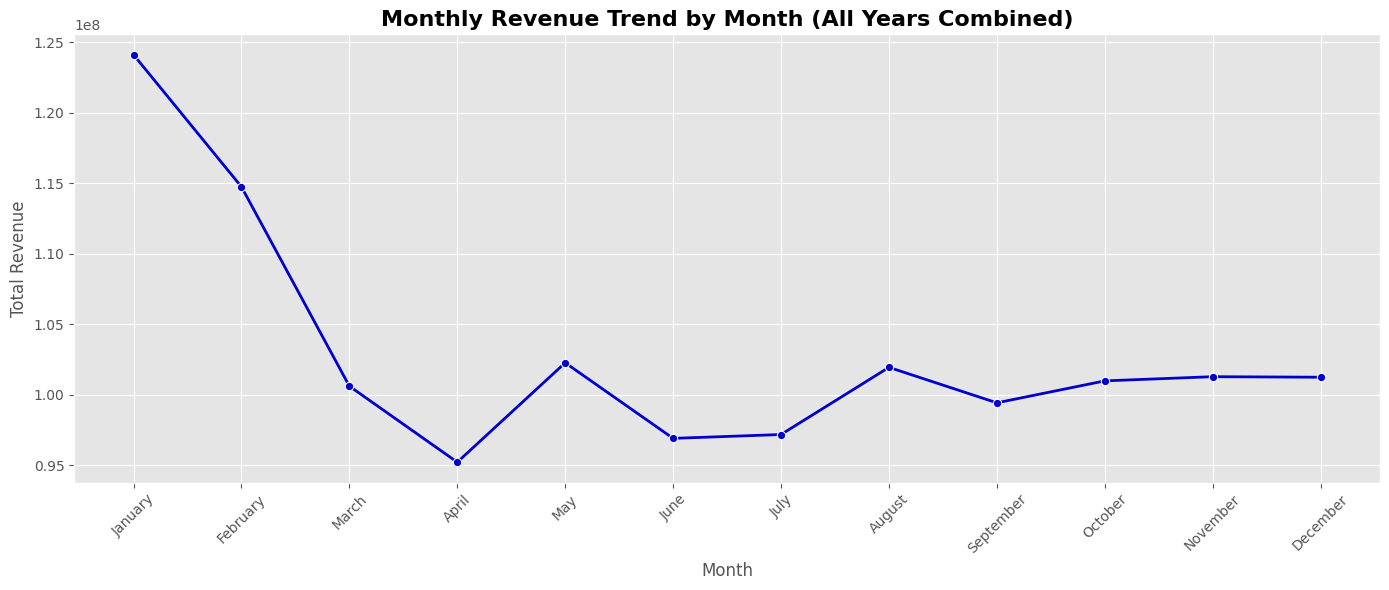

In [76]:
df["order_month_name"] = pd.to_datetime(df["order_month"].astype(str)).dt.month_name()
df["order_month_num"] = pd.to_datetime(df["order_month"].astype(str)).dt.month


monthly_sales = df.groupby(["order_month_name", "order_month_num"])["revenue"].sum().reset_index()


monthly_sales = monthly_sales.sort_values("order_month_num")


plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x="order_month_name", y="revenue",
         marker='o', linestyle='-', linewidth=2, color='mediumblue')


plt.title("Monthly Revenue Trend by Month (All Years Combined)", fontsize=16, weight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-92-2449313428.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10, y="revenue", x="product_name", palette="viridis")


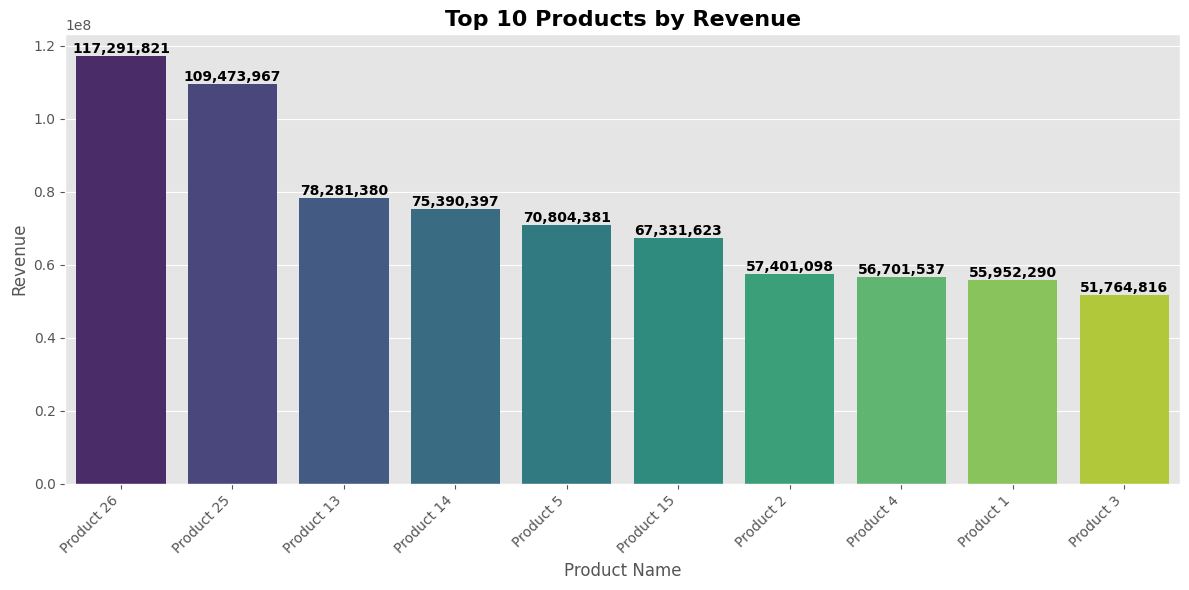

In [92]:


product_revenue = df.groupby("product_name")["revenue"].sum().reset_index()
top_10 = product_revenue.sort_values("revenue", ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_10, y="revenue", x="product_name", palette="viridis")


for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:,.0f}',
        ha='center',
        va='bottom',
        fontsize=10,
        weight='bold'
    )

plt.title("Top 10 Products by Revenue", fontsize=16, weight='bold')
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [112]:
df["channel"].value_counts()

,count
channel,
Wholesale,34596
Distributor,19968
Export,9540


/tmp/ipython-input-94-226379320.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=bottom_10, y="revenue", x="product_name", palette="viridis")


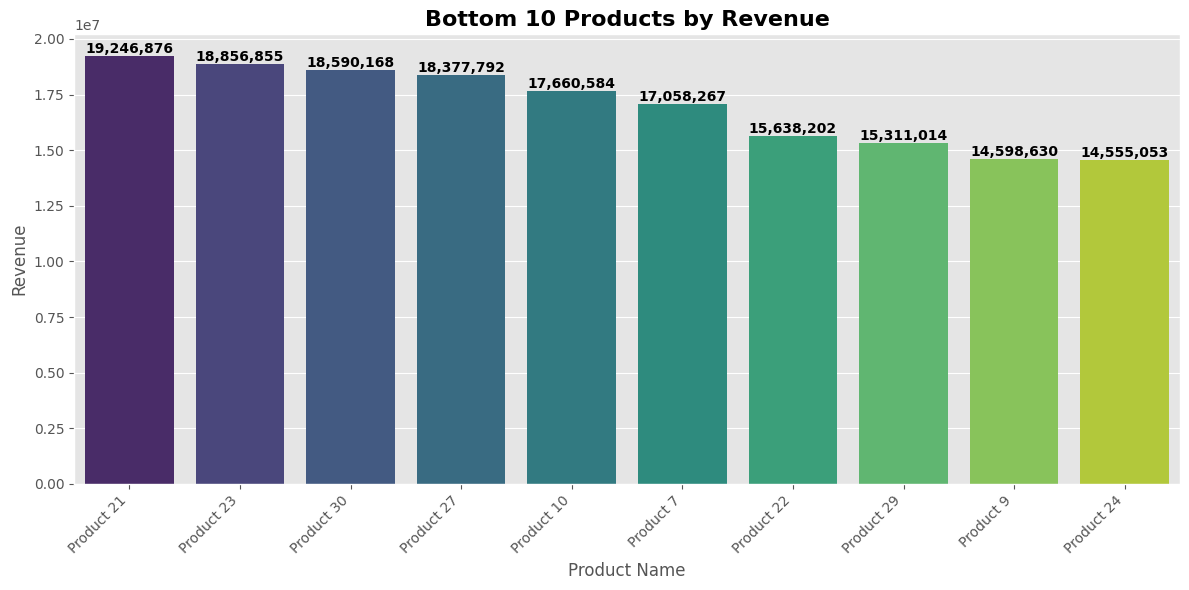

In [94]:
product_revenue = df.groupby("product_name")["revenue"].sum().reset_index()
bottom_10 = product_revenue.sort_values("revenue", ascending=False).tail(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=bottom_10, y="revenue", x="product_name", palette="viridis")

for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:,.0f}',
        ha='center',
        va='bottom',
        fontsize=10,
        weight='bold'
    )

plt.title("Bottom 10 Products by Revenue", fontsize=16, weight='bold')
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


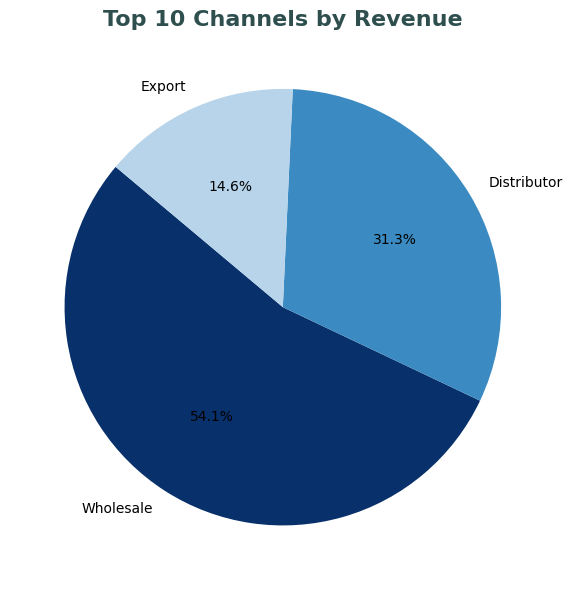

In [111]:


channel_revenue = df.groupby("channel")["revenue"].sum().reset_index()
top_10 = channel_revenue.sort_values("revenue", ascending=False).head(10)


cmap = plt.cm.Blues
colors = cmap(np.linspace(1, 0.3, len(top_10)))

plt.figure(figsize=(8, 6))
plt.pie(data=top_10, x="revenue", labels=top_10["channel"],
        autopct='%1.1f%%', startangle=140, colors=colors)

plt.title("Top 10 Channels by Revenue", fontsize=16, weight='bold', color='darkslategray')
plt.tight_layout()
plt.show()


[]

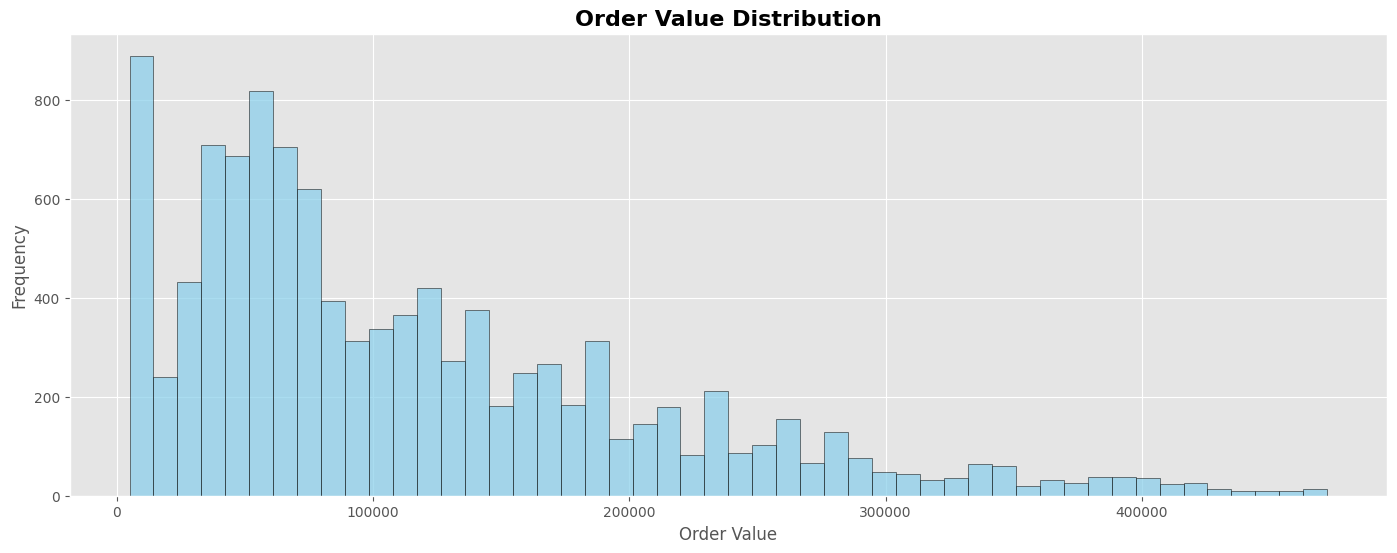

In [126]:
aod = df.groupby("order_number")["revenue"].sum().reset_index()


plt.figure(figsize=(17, 6))
plt.hist(
    aod["revenue"],
    bins=50,
    color='skyblue',
    edgecolor='black',
    alpha=0.7
)



plt.title("Order Value Distribution", fontsize=16, weight='bold')
plt.xlabel("Order Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)


plt.plot()

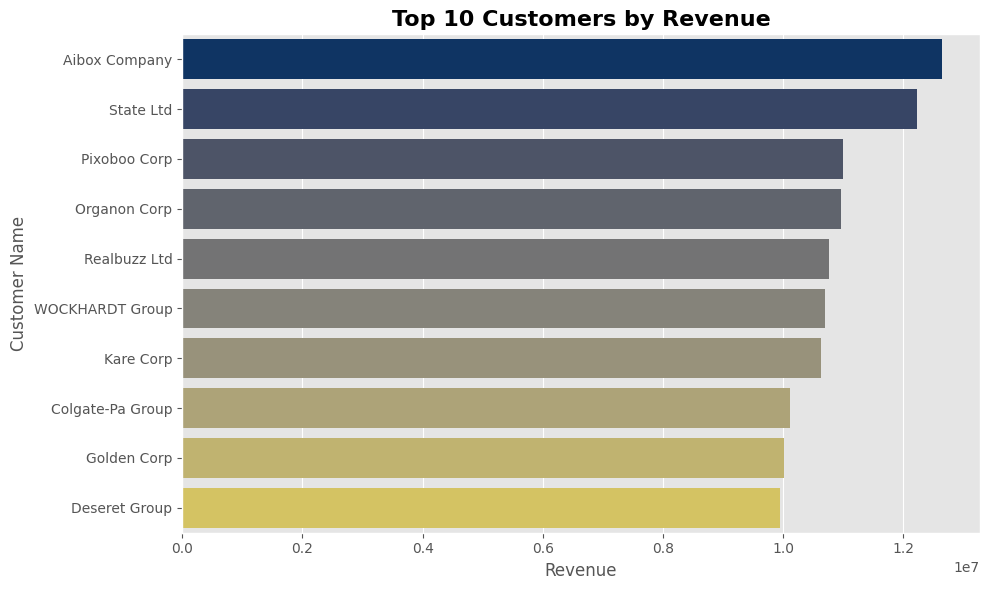

In [160]:


cust = df.groupby("customer_names")["revenue"].sum().reset_index()
top_10 = cust.sort_values("revenue", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10,
    x="revenue",
    y="customer_names",
    hue="customer_names",
    palette="cividis",
    dodge=False,
    legend=False,
    orient="h"
)

plt.title("Top 10 Customers by Revenue", fontsize=16, weight='bold')
plt.xlabel("Revenue", fontsize=12)
plt.ylabel("Customer Name", fontsize=12)
plt.tight_layout()
plt.show()


In [141]:
df.columns

Index(['order_number', 'order_date', 'customer_names', 'channel',
       'product_name', 'order_quantity', 'unit_price', 'revenue', 'cost',
       'state_code', 'state_name', 'country', 'region', 'lat', 'long',
       'budget', 'total_cost', 'profit', 'profit_margin_pct', 'order_month',
       'order_month_name', 'order_month_num'],
      dtype='object')

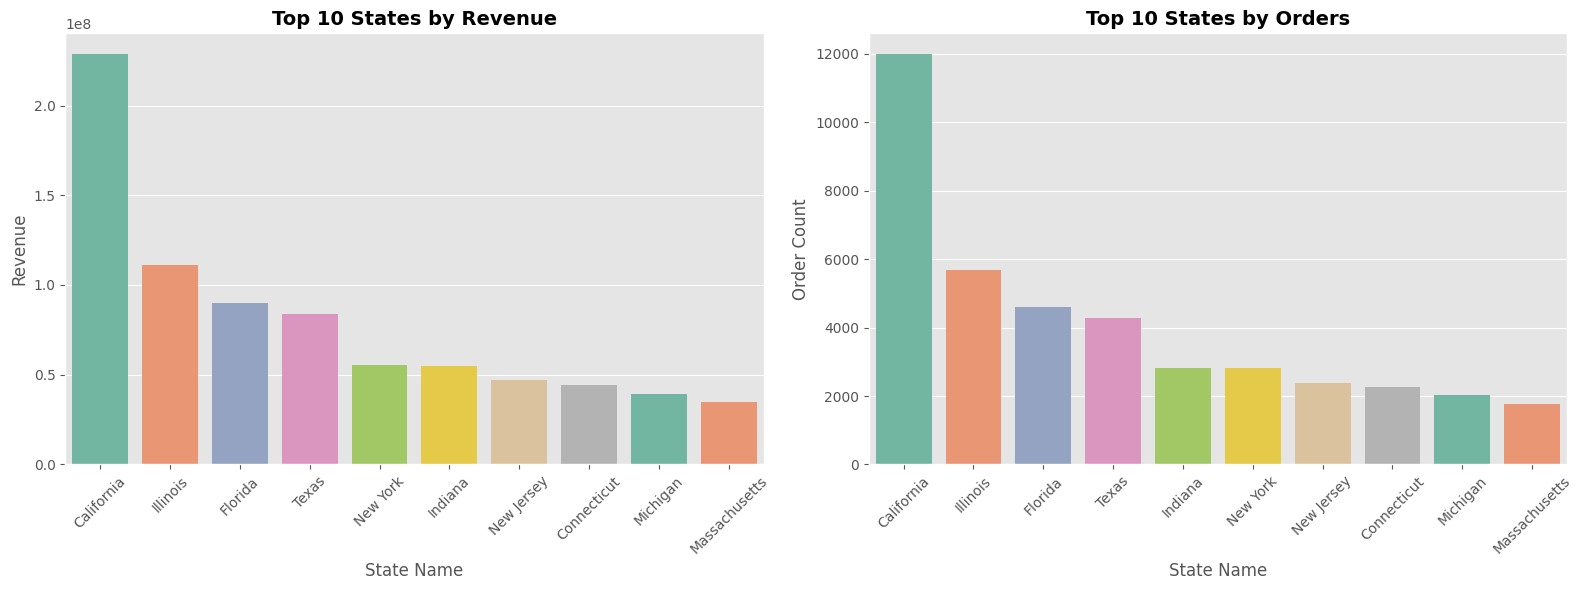

In [161]:


top_10_revenue = df.groupby("state_name")["revenue"].sum().reset_index().sort_values("revenue", ascending=False).head(10)
top_10_orders = df.groupby("state_name")["order_number"].count().reset_index().sort_values("order_number", ascending=False).head(10)


fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)


sns.barplot(
    data=top_10_revenue,
    y="revenue",
    x="state_name",
    hue="state_name",
    palette="Set2",
    dodge=False,
    legend=False,
    ax=axes[0]
)
axes[0].set_title("Top 10 States by Revenue", fontsize=14, weight='bold')
axes[0].set_xlabel("State Name")
axes[0].set_ylabel("Revenue")
axes[0].tick_params(axis='x', rotation=45)


sns.barplot(
    data=top_10_orders,
    y="order_number",
    x="state_name",
    hue="state_name",
    palette="Set2",
    dodge=False,
    legend=False,
    ax=axes[1]
)
axes[1].set_title("Top 10 States by Orders", fontsize=14, weight='bold')
axes[1].set_xlabel("State Name")
axes[1].set_ylabel("Order Count")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
